In [2]:
import pandas as pd
import json
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
# sns.set(style='ticks', context='paper', font='CMU Sans Serif')
sns.set(style='ticks', context='paper')
from collections import defaultdict
import numpy as np

In [3]:
from textwrap import wrap
color_list = [
    "cornflowerblue",
    "gold",
    "deeppink",
    "orange",
    "blueviolet",
    "seagreen",
    "black",
]
hatch_list = ["o", "x", "/", ".", "*", "-", "\\"]

linestyle_list = ["solid", "dashed", "dashdot", "dotted"]
markertype_list = ["o", "^", "x", "x", "|"]
def plot_cdf(
    raw_data,
    file_name,
    linelabels,
    x_label,
    y_label="CDF",
    log_switch=False,
    rotate_xaxis=False,
    ylim_low=0,
    xlim=None,
    xlim_bottom=None,
    fontsize=15,
    legend_font=15,
    loc=2,
    title=None,
    enable_abs=False,
    group_size=1,
):
    _fontsize = fontsize
    fig = plt.figure(figsize=(6, 4))  # 2.5 inch for 1/3 double column width
    ax = fig.add_subplot(111)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)

    ax.tick_params(axis="y", direction="in")
    ax.tick_params(axis="x", direction="in")
    if log_switch:
        ax.set_xscale("log")

    plt.ylabel(y_label, fontsize=_fontsize)
    plt.xlabel(x_label, fontsize=_fontsize)
    linelabels = ["\n".join(wrap(l, 30)) for l in linelabels]
    for i in range(len(raw_data)):
        data = raw_data[i]
        data = data[~np.isnan(data)]
        if len(data) == 0:
            continue
        if enable_abs:
            data = abs(data)
        # data=random.sample(data,min(1e6,len(data)))
        data_size = len(data)
        # data=list(filter(lambda score: 0<=score < std_val, data))
        # Set bins edges
        data_set = sorted(set(data))
        bins = np.append(data_set, data_set[-1] + 1)

        # Use the histogram function to bin the data
        counts, bin_edges = np.histogram(data, bins=bins, density=False)

        counts = counts.astype(float) / data_size

        # Find the cdf
        cdf = np.cumsum(counts)

        # Plot the cdf
        if i < len(linelabels):
            plt.plot(
                bin_edges[0:-1],
                cdf,
                linestyle=linestyle_list[(i // group_size) % len(linestyle_list)],
                color=color_list[(i % group_size) % len(color_list)],
                label=linelabels[i],
                linewidth=3,
            )
        else:
            plt.plot(
                bin_edges[0:-1],
                cdf,
                linestyle=linestyle_list[(i // group_size) % len(linestyle_list)],
                color=color_list[(i % group_size) % len(color_list)],
                linewidth=3,
            )

    legend_properties = {"size": legend_font}
    plt.legend(
        prop=legend_properties,
        frameon=False,
        loc=loc,
    )

    plt.ylim((ylim_low, 1))
    if xlim_bottom:
        plt.xlim(left=xlim_bottom)
    if xlim:
        plt.xlim(right=xlim)
    # plt.tight_layout()
    # plt.tight_layout(pad=0.5, w_pad=0.04, h_pad=0.01)
    plt.yticks(fontsize=_fontsize)
    plt.xticks(fontsize=_fontsize)
    # plt.grid(True)
    if rotate_xaxis:
        plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment="right")
    if title:
        plt.title(title, fontsize=_fontsize - 5)
    # plt.savefig(file_name, bbox_inches="tight", pad_inches=0)

['ns3: 11505.0,68431.0,120616.0', 'ns3-path-one: 110.0,687.0,3373.0', 'pmn-m: 22.0,102.0,306.0', 'flowsim: 0.0,1.0,2.0']


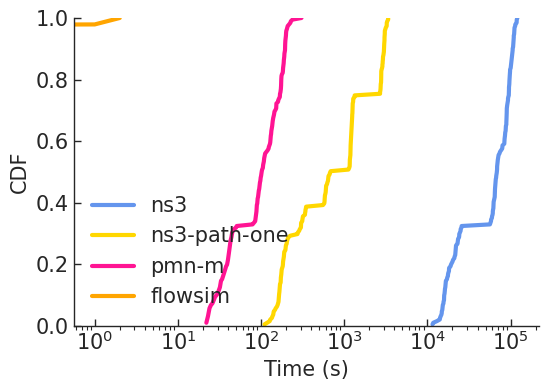

In [3]:
time_elapsed=defaultdict(lambda:[])
method_list=['ns3','ns3-path-one','pmn-m','flowsim']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/elapsed.txt') as file:
            for line in file:
                tmp=line.rstrip()
                time_elapsed[method].append(float(tmp))
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'test.pdf',method_list,'Time (s)',legend_font=15,group_size=len(method_list),log_switch=True,loc=3)

['ns3: 11505.0,68431.0,120616.0', 'pmn-m: 22.0,102.0,306.0', 'flowsim-all: 1.0,3.0,4.0']


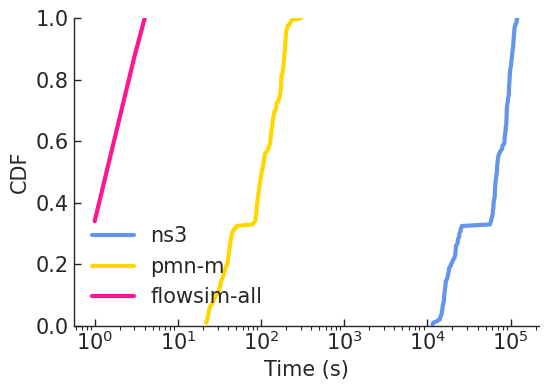

In [4]:
time_elapsed=defaultdict(lambda:[])
method_list=['ns3','pmn-m','flowsim-all']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/elapsed.txt') as file:
            for line in file:
                tmp=line.rstrip()
                time_elapsed[method].append(float(tmp))
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'test.pdf',method_list,'Time (s)',legend_font=15,group_size=len(method_list),log_switch=True,loc=3)

In [ ]:
time_elapsed=defaultdict(lambda:[])
method_list=['flowsim-all']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path.txt') as file:
            for line in file:
                tmp=line.rstrip()
                time_elapsed[method].append(float(tmp))
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'num_path.pdf',method_list,'# of Paths',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

['flowsim-all: 0.027466,0.31369899999999995,1.274799']


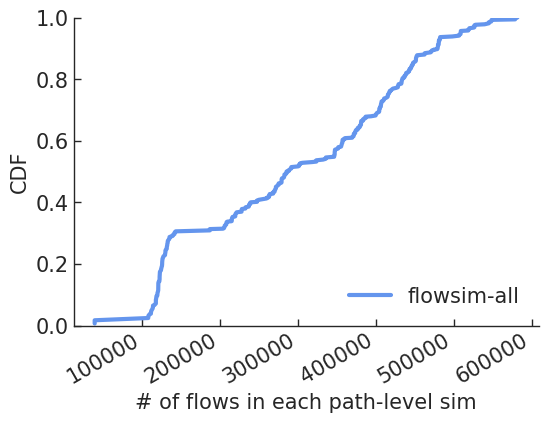

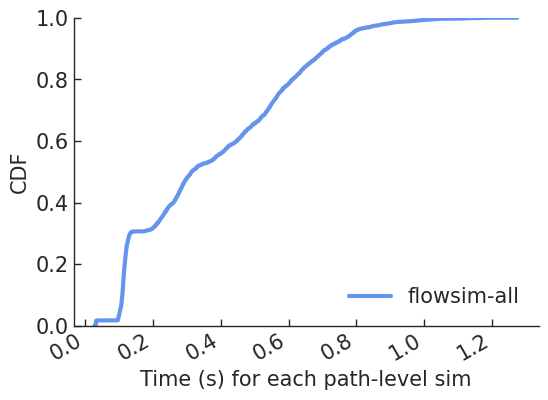

In [5]:
time_elapsed=defaultdict(lambda:[])
num_flows=defaultdict(lambda:[])
method_list=['flowsim-all']
for mix_id in range(191):
    for method in method_list:
        for path_idx in range(20):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/{path_idx}/output.txt') as file:
                line_idx=0
                for line in file:
                    if line_idx==0:
                        tmp=line.rstrip().split(':')[-1]
                        num_flows[method].append(int(tmp))
                    elif line_idx==1:
                        tmp=line.rstrip().split(':')[-1]
                        time_elapsed[method].append(float(tmp))
                    line_idx+=1
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res_time=np.array(list(time_elapsed.values()))
res_flow=np.array(list(num_flows.values()))
plot_cdf(res_flow,'num_flows.pdf',method_list,'# of flows in each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)
plot_cdf(res_time,'time_elapsed.pdf',method_list,'Time (s) for each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)